# Task 2.3 - Random Forest for ClimateWins

## Table of Contents

#### 1. Importing Libraries and Data
- Cleaned weather observations from 2.2, pleasant weather (predictions)
#### 2. Data Wrangling
-  Reduce data to only one decade at a time to limit model runtime
#### 3. Reshaping for modeling
#### 4. Data Split
#### 5. Random Forest Model
#### 6.  Uncovering Feature Importances

## 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Set a path

path = r'C:\Users\rajkaran\Documents\CareerFoundry- Data Analytics Program\3. Specialization\Achievements 1- Tasks\1. Data'

In [3]:
# Set display options to show all columns

pd.set_option('display.max_columns', None)

In [4]:
# Import cleaned weather observations data

X = pd.read_csv(os.path.join(path, '02 Data', 'Prepared', 'X_cleaned_date.csv'), index_col = False)

In [5]:
# Import predictions data

answers = pd.read_csv(os.path.join(path, '02 Data', 'Original', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [6]:
X.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  19600101      1                  7            0.85           1.018   
1  19600102      1                  6            0.84           1.018   
2  19600103      1                  8            0.90           1.018   
3  19600104      1                  3            0.92           1.018   
4  19600105      1                  6            0.95           1.018   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.32                 0.09             0.7   
1                    0.36                 1.05             1.1   
2                    0.18                 0.30             0.0   
3                    0.58                 0.00             4.1   
4                    0.65                 0.14             5.4   

   BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
0              6.5             0.8            10.9                     1   
1              6.1             3.3            10.1                     6   
2              8.5             5.1             9.9                     6   
3              6.3             3.8            10.6                     8   
4              3.0            -0.7             6.0                     8   

   BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
0               0.81             1.0195                       0.88   
1               0.84             1.0172                       0.25   
2               0.77             1.0179                       0.67   
3               0.93             1.0268                       0.25   
4               0.99             1.0286                       0.25   

   BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
0                    0.00                7.0                 3.7   
1                    0.00                0.0                 2.9   
2                    0.00                3.5                 3.1   
3                    0.00                0.0                 2.0   
4                    0.06                0.0                 2.0   

   BELGRADE_temp_min  BELGRADE_temp_max  BUDAPEST_cloud_cover  \
0               -0.9                7.9                     4   
1                2.2                4.4                     4   
2               -0.5                6.4                     4   
3               -2.0                3.0                     4   
4                0.7                2.8                     4   

   BUDAPEST_humidity  BUDAPEST_pressure  BUDAPEST_global_radiation  \
0               0.67              1.017                       0.44   
1               0.67              1.017                       0.18   
2               0.67              1.017                       0.30   
3               0.67              1.017                       0.19   
4               0.67              1.017                       0.19   

   BUDAPEST_precipitation  BUDAPEST_sunshine  BUDAPEST_temp_mean  \
0                    0.01                2.3                 2.4   
1                    0.31                0.0                 2.3   
2                    0.00                0.6                 2.7   
3                    0.00                0.0                 2.0   
4                    0.00                0.0                 2.5   

   BUDAPEST_temp_min  BUDAPEST_temp_max  DEBILT_cloud_cover  DEBILT_humidity  \
0               -0.4                5.1                   7             0.85   
1                1.4                3.1                   8             0.90   
2                1.7                5.3                   6             0.92   
3                0.4                4.4                   8             0.95   
4                1.1                5.3                   6             0.90   

   DEBILT_pressure  DEBILT_global_radiation  DEBILT_precipitation  \
0           1.0032                     0.07                  0.25   
1           1.0056                     0.14 

In [7]:
X.shape

(22950, 137)

In [8]:
answers.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   
1  19600102                       0                          0   
2  19600103                       0                          0   
3  19600104                       0                          0   
4  19600105                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [9]:
answers.shape

(22950, 16)

## 2. Data Wrangling
- Reduce data to one decade. Chosen decade: 2010s (2010-2019).
- The data should be regular, with the same number of entries for each station.

In [10]:
# Reduce observations dataset to 2010's

dfdecade = X[(X['DATE'].astype(str).str[:4] >= '2010') & (X['DATE'].astype(str).str[:4] <= '2019')]
dfdecade

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
18263  20100101      1                  8            0.93          0.9965   
18264  20100102      1                  3            0.74          1.0193   
18265  20100103      1                  3            0.75          1.0226   
18266  20100104      1                  5            0.83          1.0169   
18267  20100105      1                  7            0.78          1.0073   
...         ...    ...                ...             ...             ...   
21910  20191227     12                  8            0.92          1.0273   
21911  20191228     12                  7            0.86          1.0380   
21912  20191229     12                  6            0.93          1.0387   
21913  20191230     12                  1            0.81          1.0354   
21914  20191231     12                  5            0.87          1.0350   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
18263                    0.18                 0.56             0.0   
18264                    0.58                 0.00             5.2   
18265                    0.61                 0.00             6.3   
18266                    0.48                 0.00             3.7   
18267                    0.53                 0.04             4.4   
...                       ...                  ...             ...   
21910                    0.15                 0.52             0.1   
21911                    0.35                 0.00             1.3   
21912                    0.61                 0.00             4.9   
21913                    0.64                 0.00             6.5   
21914                    0.58                 0.00             3.5   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
18263              2.9            -0.2             4.8                     6   
18264             -1.5            -4.2             0.4                     8   
18265             -3.2            -6.0             1.1                     7   
18266             -4.9            -8.3            -3.1                     2   
18267             -4.0            -7.1            -1.5                     6   
...                ...             ...             ...                   ...   
21910              6.8             5.6             7.9                     5   
21911              3.7            -0.6             5.7                     8   
21912             -0.8            -2.7             2.6                     8   
21913              0.5            -3.0             5.1                     6   
21914              0.4            -1.3             3.5                     2   

       BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
18263               0.85             0.9912                       0.64   
18264               0.92             0.9995                       0.25   
18265               0.82             1.0156                       0.25   
18266               0.72             1.0211                       0.86   
18267               0.81             1.0111                       0.39   
...                  ...                ...                        ...   
21910               0.68             1.0231                       0.20   
21911               0.68             1.0269                       0.21   
21912               0.68             1.0327                       0.21   
21913               0.68             1.0381                       0.21   
21914               0.68             1.0324                       0.48   

       BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
18263                    2.63                3.2                 9.9   
18264                    0.74                0.0                 3.5   
18265                    0.12                0.0                -0.6   
18266                    0.00                6.4                 0.0   
18267                    1.20      

In [11]:
# Reduce answers dataset to 2010's

answers_decade = answers[(answers['DATE'].astype(str).str[:4] >= '2010') & (answers['DATE'].astype(str).str[:4] <= '2019')]
answers_decade

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
18263  20100101                       0                          0   
18264  20100102                       0                          0   
18265  20100103                       0                          0   
18266  20100104                       0                          0   
18267  20100105                       0                          0   
...         ...                     ...                        ...   
21910  20191227                       0                          0   
21911  20191228                       0                          0   
21912  20191229                       0                          0   
21913  20191230                       0                          0   
21914  20191231                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
18263                          0                        0   
18264                          0                        0   
18265                          0                        0   
18266                          0                        0   
18267                          0                        0   
...                          ...                      ...   
21910                          0                        0   
21911                          0                        0   
21912                          0                        0   
21913                          0                        0   
21914                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
18263                            0                          0   
18264                            0                          0   
18265                            0                          0   
18266                            0                          0   
18267                            0                          0   
...                            ...                        ...   
21910                            0                          0   
21911                            0                          0   
21912                            0                          0   
21913                            0                          0   
21914                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
18263                        0                           0   
18264                        0                           0   
18265                        0                           0   
18266                        0                           0   
18267                        0                           0   
...                        ...                         ...   
21910                        0                           0   
21911                        0                           0   
21912                        0                           0   
21913                        0                           0   
21914                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
18263                            0                        0   
18264                            0                        0   
18265                            0                        0   
18266                            0                        0   
18267                            0                        0   
...                            ...                      ...   
21910                            0                        0   
21911                            0                        0   
21912                            0                        0   
21913                            0                        0   
21914                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
18263                          0                      0   
18264                          0    

In [12]:
# Set display options to show all rows

pd.set_option('display.max_rows', None)

In [13]:
# Extract stations list

stations = [col.split('_')[0] for col in dfdecade.columns if '_' in col]

In [14]:
# Create a set of unique station names

unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [15]:
# Create a dictionary to store the frequency of entries for each station
station_frequencies = {}

for station in unique_stations:
    # Select columns that belong to the current station
    station_columns = [col for col in  dfdecade.columns if col.startswith(station)]
    
    # Count non-missing entries across all columns for the station
    station_frequencies[station] =  dfdecade[station_columns].notna().sum().sum()

# Print the frequency of entries for each station
print("Frequency of entries for each weather station:")
for station, freq in station_frequencies.items():
    print(f"{station}: {freq} entries")

Frequency of entries for each weather station:
MAASTRICHT: 32868 entries
STOCKHOLM: 32868 entries
DUSSELDORF: 32868 entries
BUDAPEST: 32868 entries
HEATHROW: 32868 entries
LJUBLJANA: 32868 entries
MUNCHENB: 32868 entries
VALENTIA: 32868 entries
BASEL: 32868 entries
KASSEL: 32868 entries
BELGRADE: 32868 entries
DEBILT: 32868 entries
MADRID: 32868 entries
SONNBLICK: 32868 entries
OSLO: 32868 entries


#### We have the same number of entries (32'868) for each station.

In [16]:
# Drop unnecessary columns

dfdecade.drop(['DATE', 'MONTH'], axis=1, inplace=True)

In [17]:
dfdecade.shape # observations dataset has the correct shape

(3652, 135)

In [18]:
answers_decade.drop(columns = 'DATE', inplace = True)

In [19]:
answers_decade.shape # predictions dataset has the correct shape

(3652, 15)

## 3. Reshaping for modeling
The final shapes should be X = (3653, 135) and y = (3653,) for one decade of information.

In [20]:
X = dfdecade

In [21]:
y = answers_decade

In [22]:
# Turn X and y from a df to arrays

X = np.array(X)
y = np.array(y)

In [23]:
X.shape

(3652, 135)

In [24]:
y.shape

(3652, 15)

## 4. Data Split 

In [25]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [26]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739, 15)
(913, 135) (913, 15)


## 5. Random Forest Model

In [42]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.5870755750273823


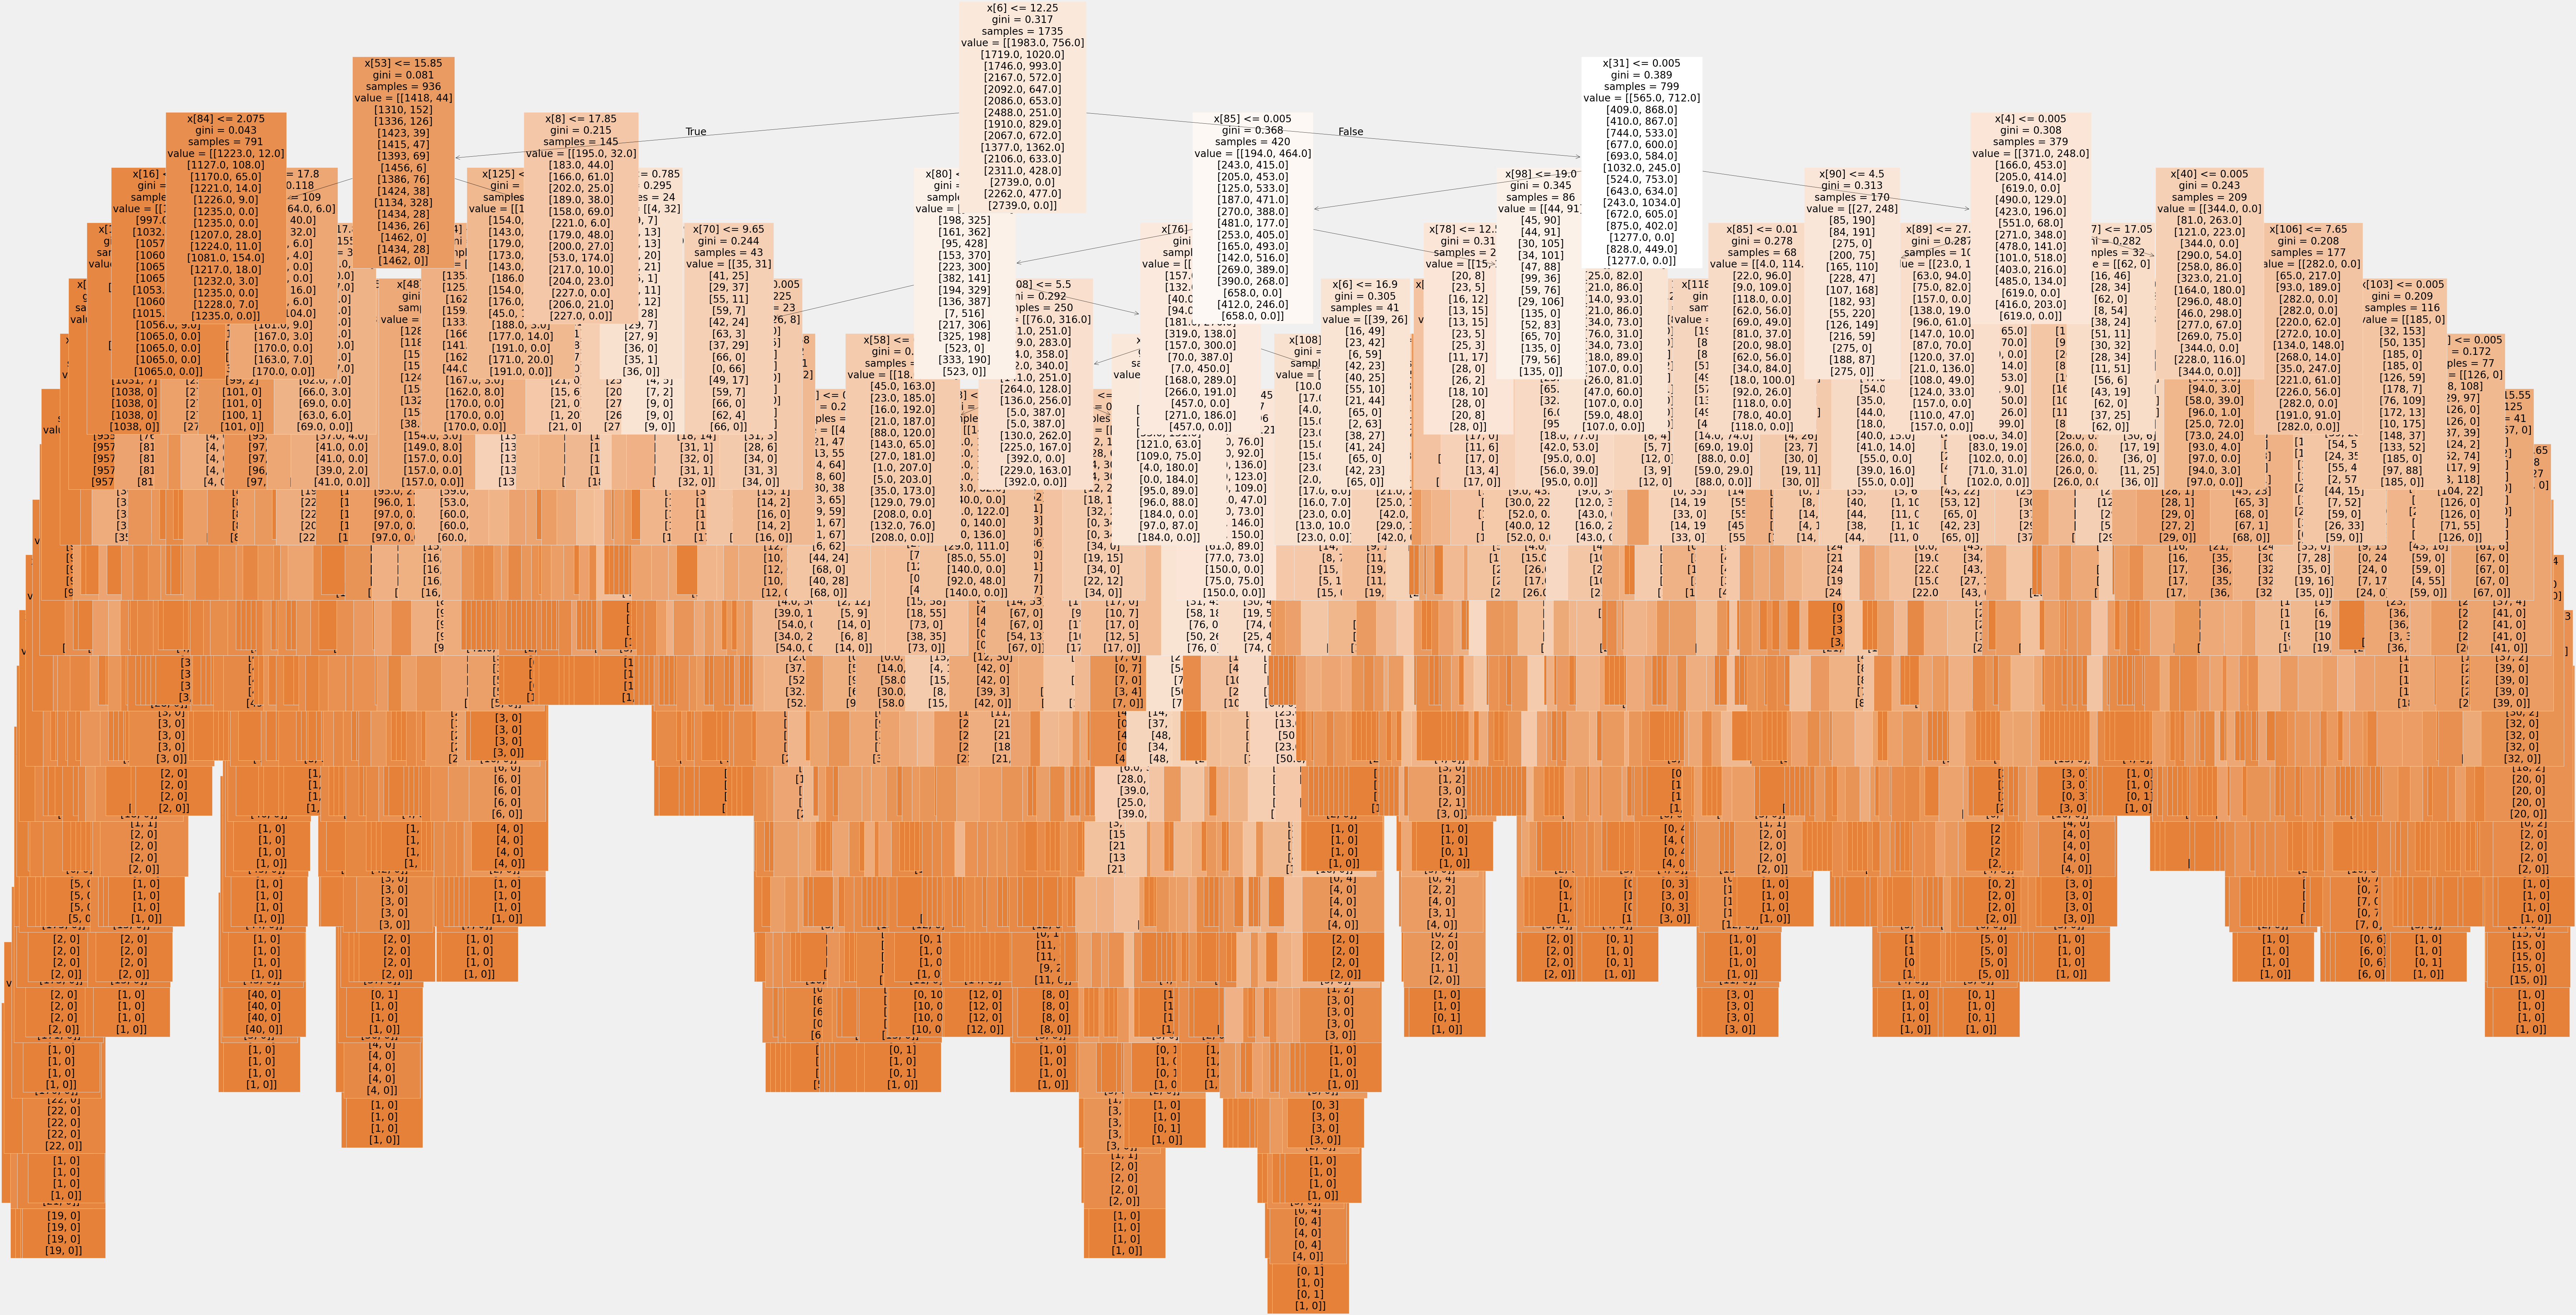

In [44]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, filled=True);

In [45]:
fig.savefig(os.path.join(path, '04 Visualizations', 'random_forest_2010s.png'),bbox_inches='tight')

## 6. Uncovering Feature Importances

In [31]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(135,)


array([2.91806110e-03, 2.75295675e-03, 2.87666938e-03, 3.28807145e-03,
       2.49271208e-02, 1.23704739e-02, 1.22509590e-02, 6.19842674e-03,
       3.12435286e-02, 2.97439755e-03, 2.70193905e-03, 3.62461565e-03,
       2.36194371e-03, 1.88810581e-02, 2.81393776e-03, 5.07042548e-03,
       2.43267504e-03, 2.08171398e-02, 3.85663281e-04, 0.00000000e+00,
       0.00000000e+00, 1.07032412e-03, 1.55271181e-02, 1.18987534e-03,
       2.32669046e-02, 5.40936289e-03, 2.50936897e-02, 1.68720466e-03,
       2.44632419e-03, 3.78624971e-03, 3.11467022e-03, 1.50149911e-02,
       3.86308538e-03, 2.11116970e-02, 1.93123119e-03, 1.89440763e-02,
       1.99717542e-03, 2.98006276e-03, 3.74258351e-03, 3.63858790e-03,
       1.92897539e-02, 6.63661465e-03, 5.11357364e-02, 4.75911786e-03,
       3.31808578e-02, 2.18887869e-03, 3.60399332e-03, 2.93527160e-03,
       3.29554921e-03, 9.97387997e-03, 3.37631583e-03, 1.15271479e-02,
       2.29807758e-03, 1.17748602e-02, 1.40498940e-03, 2.45850720e-03,
      

In [32]:
# Reshape newarray

newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[2.91806110e-03, 2.75295675e-03, 2.87666938e-03, 3.28807145e-03,
         2.49271208e-02, 1.23704739e-02, 1.22509590e-02, 6.19842674e-03,
         3.12435286e-02],
        [2.97439755e-03, 2.70193905e-03, 3.62461565e-03, 2.36194371e-03,
         1.88810581e-02, 2.81393776e-03, 5.07042548e-03, 2.43267504e-03,
         2.08171398e-02],
        [3.85663281e-04, 0.00000000e+00, 0.00000000e+00, 1.07032412e-03,
         1.55271181e-02, 1.18987534e-03, 2.32669046e-02, 5.40936289e-03,
         2.50936897e-02],
        [1.68720466e-03, 2.44632419e-03, 3.78624971e-03, 3.11467022e-03,
         1.50149911e-02, 3.86308538e-03, 2.11116970e-02, 1.93123119e-03,
         1.89440763e-02],
        [1.99717542e-03, 2.98006276e-03, 3.74258351e-03, 3.63858790e-03,
         1.92897539e-02, 6.63661465e-03, 5.11357364e-02, 4.75911786e-03,
         3.31808578e-02],
        [2.18887869e-03, 3.60399332e-03, 2.93527160e-03, 3.29554921e-03,
         9.97387997e-03, 3.37631583e-03, 1.15271479e-02, 2.29807758

In [33]:
# Collapse this shape into one observation for each weather station

sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.09882627, 0.06167813, 0.07194294, 0.07189953, 0.12736049,
       0.05097397, 0.02803763, 0.07856054, 0.12296819, 0.06120176,
       0.07666902, 0.05909344, 0.03126346, 0.05612453, 0.0034001 ])

In [34]:
# Convert the set of unique stations to a list

unique_stations_list = list(unique_stations)

In [35]:
important = pd.Series(sumarray, index = unique_stations_list)
important = important.sort_values(ascending = False)
important

HEATHROW      0.127360
BASEL         0.122968
MAASTRICHT    0.098826
VALENTIA      0.078561
BELGRADE      0.076669
DUSSELDORF    0.071943
BUDAPEST      0.071900
STOCKHOLM     0.061678
KASSEL        0.061202
DEBILT        0.059093
SONNBLICK     0.056125
LJUBLJANA     0.050974
MADRID        0.031263
MUNCHENB      0.028038
OSLO          0.003400
dtype: float64

In [37]:
# Create a df to associate weather stations with their importances

df_importance = pd.DataFrame({
    'Weather Station': unique_stations_list,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)

['MAASTRICHT', 'STOCKHOLM', 'DUSSELDORF', 'BUDAPEST', 'HEATHROW', 'LJUBLJANA', 'MUNCHENB', 'VALENTIA', 'BASEL', 'KASSEL', 'BELGRADE', 'DEBILT', 'MADRID', 'SONNBLICK', 'OSLO']


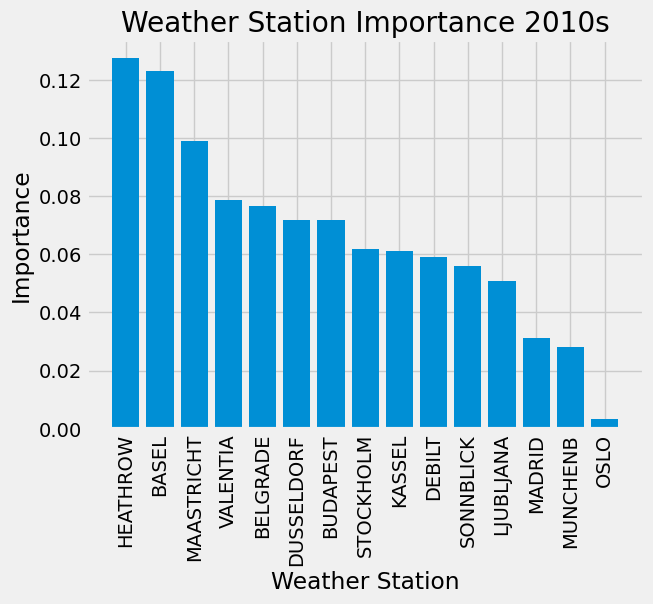

In [48]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
print(unique_stations_list)

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance 2010s')

plt.savefig(os.path.join(path, '04 Visualizations', '2010s_feauture_importances.png'), bbox_inches='tight')

plt.show()